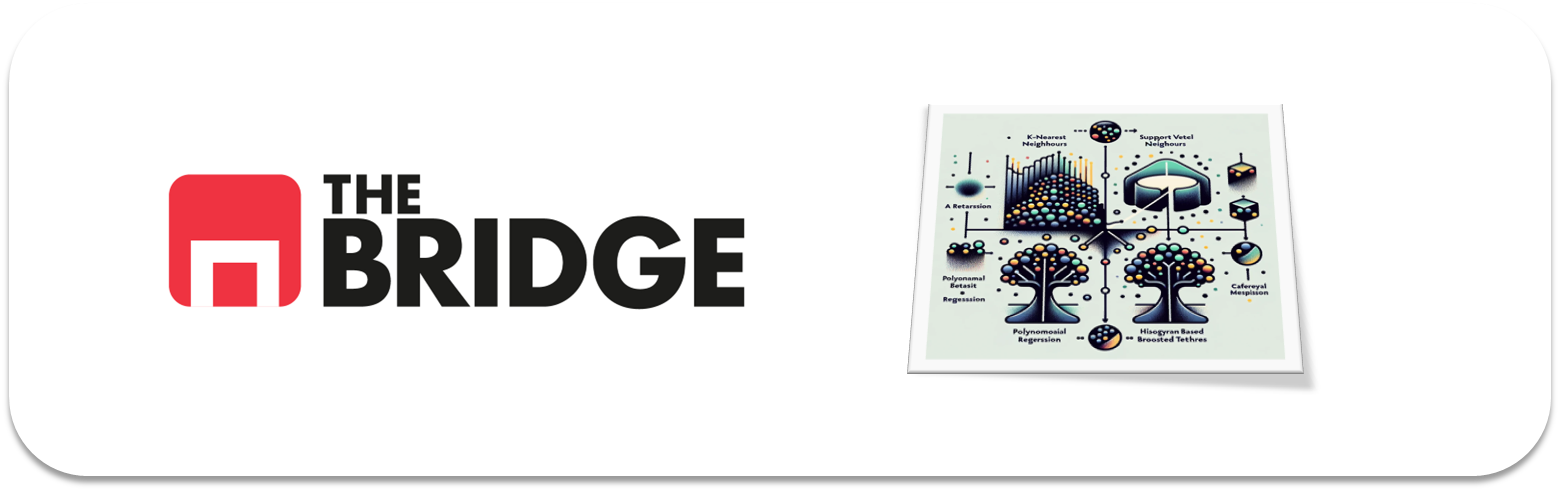

## PRACTICA OBLIGATORIA: **Otros Modelos Supervisados**

* La práctica obligatoria de esta unidad consiste en resolver un modelado de clasificación, incluyendo KNN entre los posibles modelos, y aplicando balanceado. Para ello utilizaremos un dataset que ya hemos empleado en los workout. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [38]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler



### #1. El problema y los datos

In [20]:
df = pd.read_csv("./data/credit_npo.csv")

In [21]:
df

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0,0.081892,37,0,0.070709,5656.0,12,1,0,0,0.0
1,0,0.023413,74,0,0.209197,4870.0,9,0,1,0,0.0
2,0,0.000000,43,0,0.080784,5000.0,2,0,0,0,2.0
3,0,0.492754,44,0,0.412735,7333.0,4,0,2,0,3.0
4,0,1.000000,63,0,0.000000,8333.0,3,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
12532,0,0.197116,59,0,0.290216,5140.0,6,0,1,0,0.0
12533,0,0.036726,62,0,0.884985,5833.0,12,0,1,0,0.0
12534,0,0.120313,49,0,0.577676,6333.0,7,0,2,0,2.0
12535,0,0.252566,63,0,0.037640,14000.0,9,0,0,0,1.0


In [16]:
df.dtypes

SeriousDlqin2yrs                          int64
RevolvingUtilizationOfUnsecuredLines    float64
age                                       int64
NumberOfTime30-59DaysPastDueNotWorse      int64
DebtRatio                               float64
MonthlyIncome                           float64
NumberOfOpenCreditLinesAndLoans           int64
NumberOfTimes90DaysLate                   int64
NumberRealEstateLoansOrLines              int64
NumberOfTime60-89DaysPastDueNotWorse      int64
NumberOfDependents                      float64
dtype: object

In [4]:
df.SeriousDlqin2yrs.value_counts()

SeriousDlqin2yrs
0    11673
1      864
Name: count, dtype: int64

Vamos a volver al dataset con el que vimos la clasificación binaria con regresión logística, "Give me some credit", y nuestro objetivo es crear un modelo que nos permita predicir si una persona va a encontrarse en dificultades financieras en los dos próximos años. El dataset de partida lo puedes en contrar en el directorio data que acompaña al ejercicio. 

### #1.1
Cárgalo y, apoyándote en las herramientas y fuentes que consideres necesarias, haz una descripción textual de sus variables. Luego con ayuda de los datos, haz una clasificación inicial de sus variables en categóricas y numéricas.

| Columna | Descripcion| Tipo de variable  | Importancia| 
|--------------|--------------|--------------|--------------| 
|SeriousDlqin2yrs | Si se encuentra en dificultades financieras en 2 años|Variable categórica|target|
| RevolvingUtilizationOfUnsecuredLines |Utilización rotativa de líneas no aseguradas  |Variable numérica continua|  |
| age |  Edad de la persona |Variable numérica continua|  |
|NumberOfTime30-59DaysPastDueNotWorse| Numero de veces que hay retraso en pagos entre 30 y 59 dias|Variable numérica discreta  |   |
|DebtRatio| Ratio de deuda|Variable numérica continua|   |
|MonthlyIncome| ingresos mensuales |Variable numérica continua  |   |
|NumberOfOpenCreditLinesAndLoans| Numero de creditos o prestamos abiertos|Variable numérica discreta|   |
|NumberOfTimes90DaysLate| Numero de veces que hay retraso en pagos 90 dias o mas |Variable numérica discreta  |   |
|NumberRealEstateLoansOrLines| Numero de prestamos hipotecarios |Variable numérica discreta |   |
|NumberOfTime60-89DaysPastDueNotWorse| Numero de veces que hay retraso en pagos entre 60 y 89 dias|Variable numérica discreta|   |
|NumberOfDependents| Numero de dependientes de esa persona(familia)|Variable numérica discreta  |   |

### #1.2
¿Qué tipo de problema estamos tratando? ¿Cuál es la variable target?


* Se trata de un problema de clasificacion, la variable target es Seriousdlqin2years que indica si una persona tuvo problemas financieros en los dos próximos años (0: No, 1: Sí)

### #1.3
Pinta la distribución de frecuencias del target y coméntala

In [74]:
df = df.rename(columns={'SeriousDlqin2yrs': 'Target'})

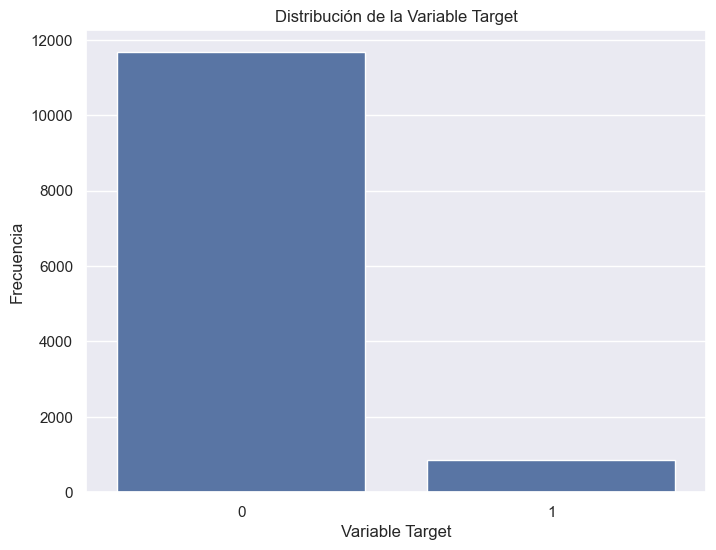

In [75]:
sns.set(style="darkgrid")
plt.figure(figsize=(8, 6))

sns.countplot(x='Target', data=df)
plt.title('Distribución de la Variable Target')
plt.xlabel('Variable Target')
plt.ylabel('Frecuencia')

plt.show()

In [58]:
Target = "Target"

In [76]:
df['MonthlyIncome'].fillna(df['MonthlyIncome'].median(), inplace=True)

# Imputación de NumberOfDependents con la moda
df['NumberOfDependents'].fillna(df['NumberOfDependents'].mode()[0], inplace=True)

# MINI EDA #

In [77]:
numericas_continuas = ["RevolvingUtilizationOfUnsecuredLines","age","DebtRatio","MonthlyIncome"]
numericas_discretas = ["NumberOfTime30-59DaysPastDueNotWorse","NumberOfOpenCreditLinesAndLoans","NumberOfTimes90DaysLate","NumberRealEstateLoansOrLines","NumberOfTime60-89DaysPastDueNotWorse","NumberOfDependents"]

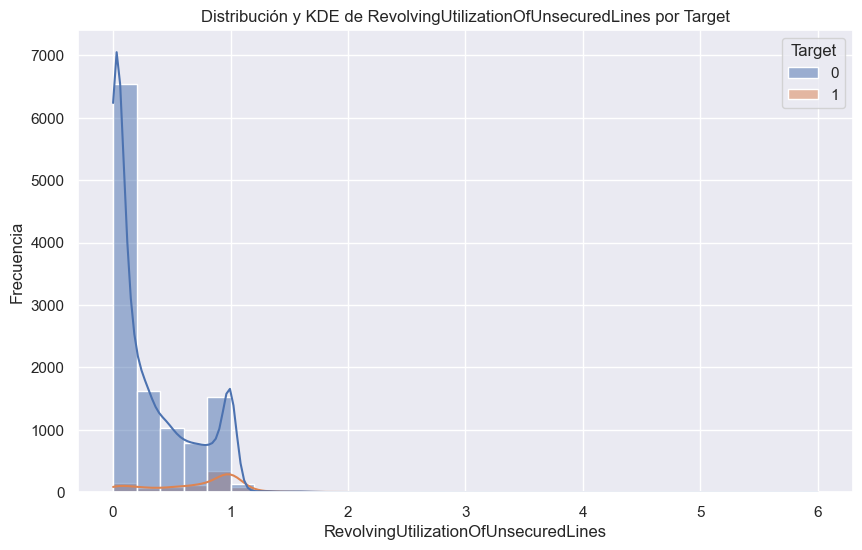

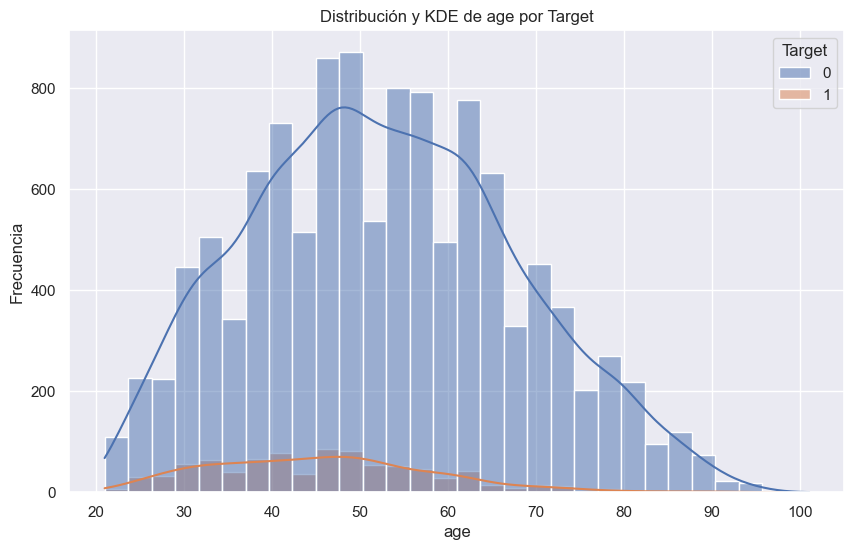

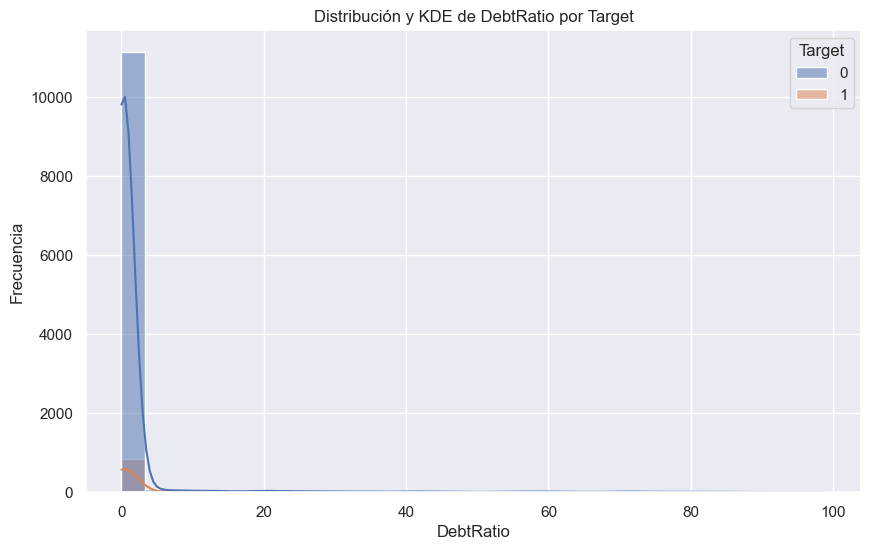

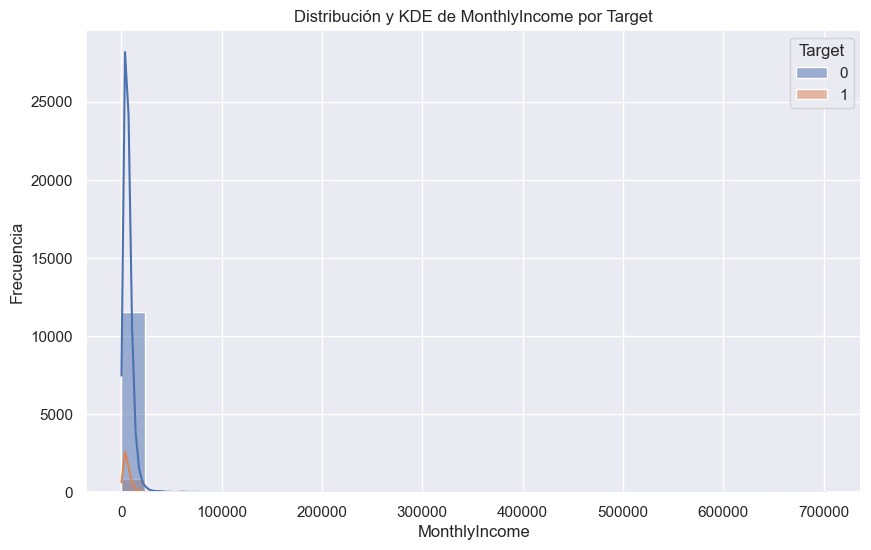

In [78]:
# Visualización de la distribución y KDE para variables numéricas continuas por categoría de Target
for feature in numericas_continuas:
    plt.figure(figsize=(10, 6))
    
    # Histograma y KDE
    sns.histplot(df, x=feature, hue=Target, bins=30, kde=True, common_norm=False)
    plt.title(f'Distribución y KDE de {feature} por {Target}')
    plt.xlabel(feature)
    plt.ylabel('Frecuencia')
    
    plt.show()

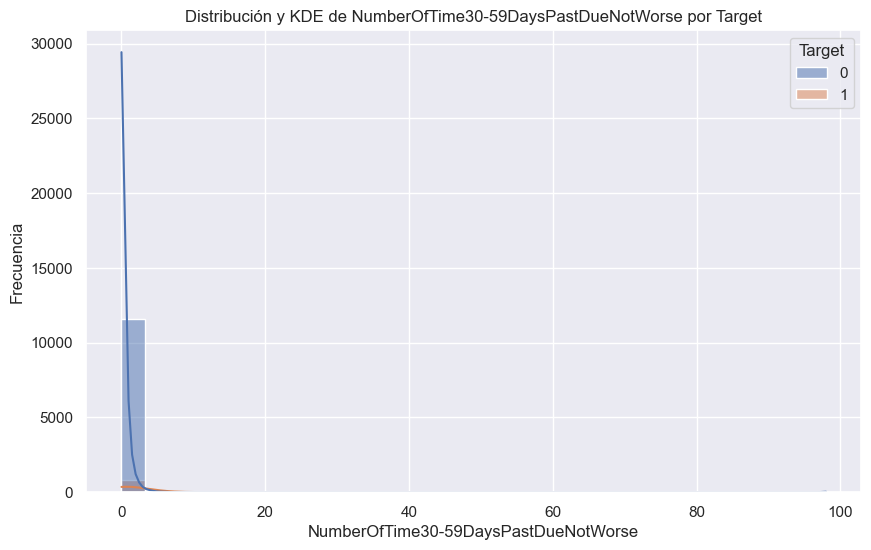

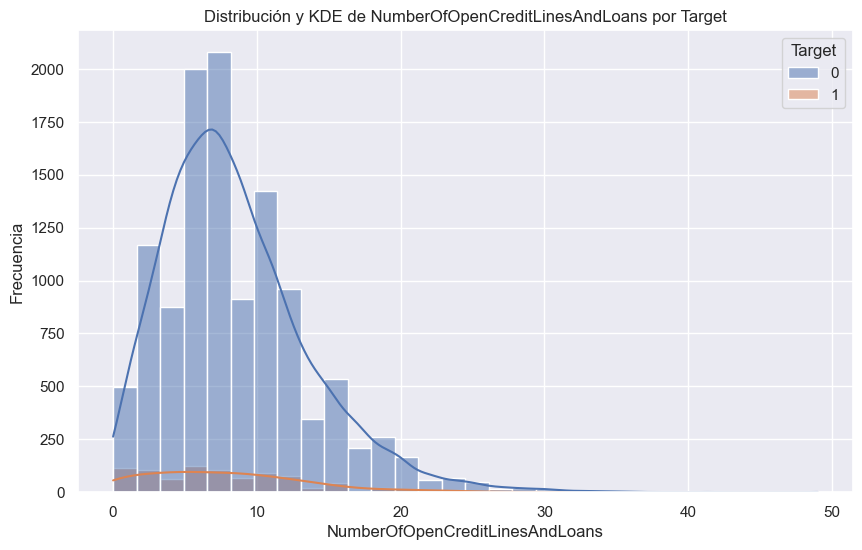

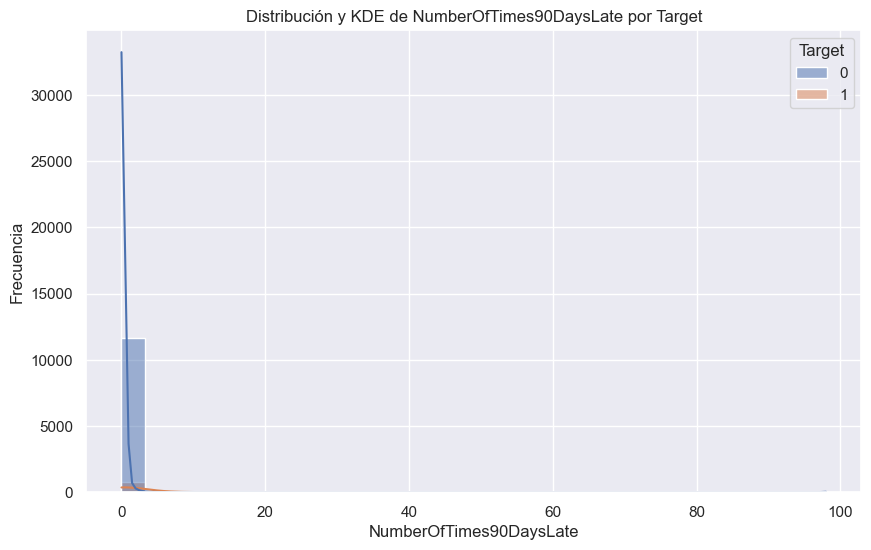

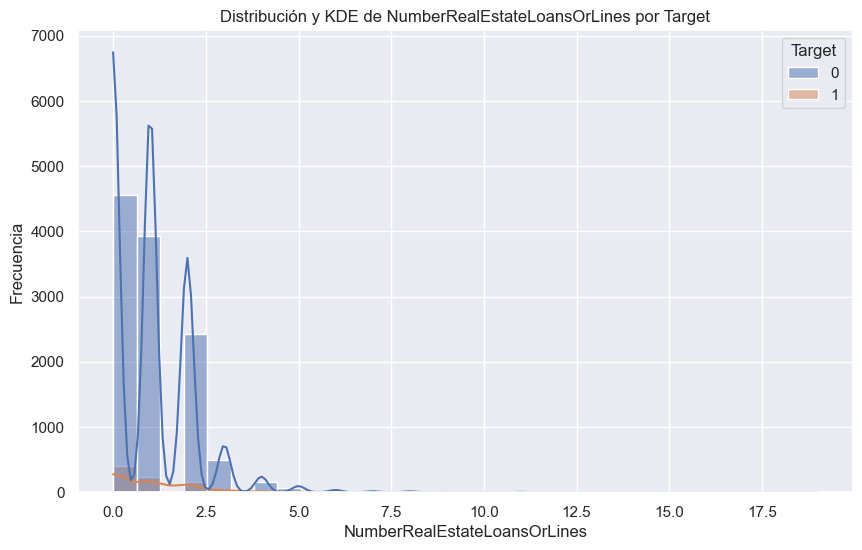

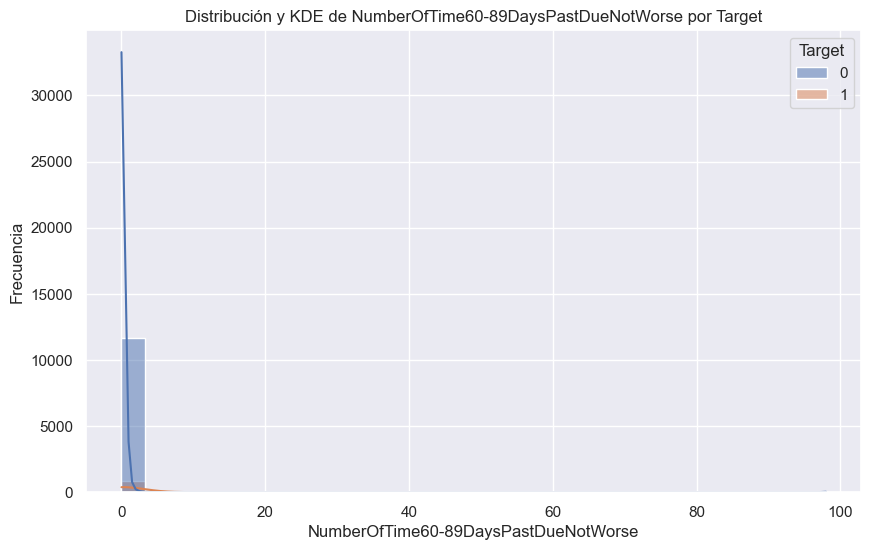

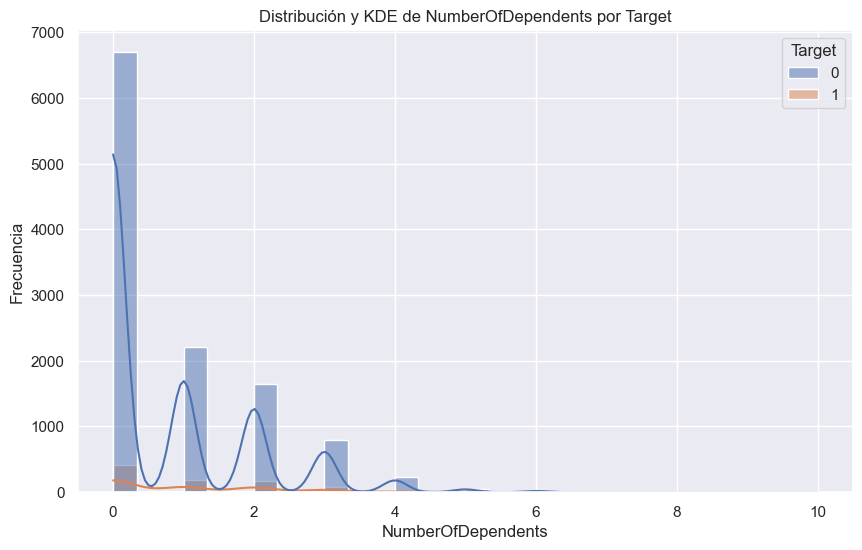

In [79]:
# Visualización de la distribución y KDE para variables numéricas discretas por categoría de Target
for feature in numericas_discretas:
    plt.figure(figsize=(10, 6))
    
    # Histograma y KDE
    sns.histplot(df, x=feature, hue=Target, bins=30, kde=True, common_norm=False)
    plt.title(f'Distribución y KDE de {feature} por {Target}')
    plt.xlabel(feature)
    plt.ylabel('Frecuencia')
    
    plt.show()

### #2 Modelado

Realiza un proceso completo de modelado hasta dar con el mejor modelo de los que hayas escogido (emplea al menos 3, y uno tiene que ser KNN). Aplica las técnicas que creas necesarias para obtener el mejor resultado (suponiendo que este después de hablar con el negocio es el recall medio, para tener un compromiso entre las dos clases). Para comparar modelos emplea validación cruzada antes de optimización y luego ajusta los hiperparámetros del mejor modelo. Evalúa este y haz un pequeño análisis de errores.

In [65]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [80]:
X = df.drop(Target, axis=1)
y = df[Target]

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [82]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [83]:
models = {
    'Logistic Regression':LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'KNN': KNeighborsClassifier()
}

# Validación cruzada
for model_name, model in models.items():
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='recall')
    print(f'{model_name}: Recall Medio - {cv_scores.mean()}')

Logistic Regression: Recall Medio - 0.054235055724417426
Random Forest: Recall Medio - 0.17259371833839915
KNN: Recall Medio - 0.10845997973657548


In [84]:
# Optimización de hiperparámetros para Random Forest (ejemplo)
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_model = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='recall')
grid_search.fit(X_train_scaled, y_train)

# Mejores hiperparámetros
best_params = grid_search.best_params_
print(f'Mejores Hiperparámetros: {best_params}')

# Mejor modelo
best_model = grid_search.best_estimator_

Mejores Hiperparámetros: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}


In [85]:
y_pred = best_model.predict(X_test_scaled)

# Imprimir informe de clasificación y matriz de confusión
print("Informe de clasificación:")
print(classification_report(y_test, y_pred))

print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))

Informe de clasificación:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      2345
           1       0.61      0.21      0.31       163

    accuracy                           0.94      2508
   macro avg       0.78      0.60      0.64      2508
weighted avg       0.93      0.94      0.93      2508

Matriz de confusión:
[[2323   22]
 [ 129   34]]
